In [10]:
# table https://colab.research.google.com/drive/1LO7mJBnkccfwlKUFX17rJONbf_tUEukC?usp=sharing
# game Pong 18.9 (1.3)

In [11]:
import gymnasium as gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from collections import deque
from utils import DQNbn, DQN, make_env, ReplayMemory, train

%matplotlib inline

In [12]:
env = gym.make("BreakoutNoFrameskip-v4")

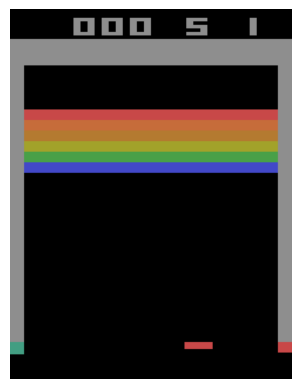

In [13]:
plt.imshow(env.reset()[0])
plt.axis("off")  # Убрать оси координат
plt.show()

In [14]:
env.reset()

n_actions = env.action_space.n
state_dim = env.observation_space.shape

print(f"Action_space: {n_actions} \nState_space: {env.observation_space.shape}")

env.close()

Action_space: 4 
State_space: (210, 160, 3)


In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [16]:
BATCH_SIZE = 32
GAMMA = 0.99
EPS_START = 1
EPS_END = 0.02
EPS_DECAY = 100000
TARGET_UPDATE = 500
RENDER = False
lr = 1e-4
INITIAL_MEMORY = 1_000
MEMORY_SIZE = 100 * INITIAL_MEMORY

In [17]:
policy_net = DQNbn(n_actions=4).to(device)  # убираем действия с FIRE
target_net = DQNbn(n_actions=4).to(device)
# policy_net = DQN(n_actions=4, in_channels=4).to(device)  # убираем действия с FIRE
# target_net = DQN(n_actions=4, in_channels=4).to(device)
target_net.load_state_dict(policy_net.state_dict())

optimizer = torch.optim.Adam(policy_net.parameters(), lr=lr)

steps_done = 0

# create environment
env = gym.make("BreakoutNoFrameskip-v4")
env = make_env(env)

memory = ReplayMemory(MEMORY_SIZE)

In [18]:
train(
    model_name="breakout_dqn",
    env=env,
    n_episodes=10_000,
    memory=memory,
    device=device,
    initial_memory=INITIAL_MEMORY,
    policy_net=policy_net,
    target_net=target_net,
    gamma=GAMMA,
    optimizer=optimizer,
    batch_size=BATCH_SIZE,
    target_update=TARGET_UPDATE,
    eps_end=EPS_END,
    eps_start=EPS_START,
    eps_decay=EPS_DECAY,
    render=False,
)

  0%|          | 41/10000 [00:09<1:37:32,  1.70it/s]

Total steps: 1501 	 Episode: 40/68 	 Total reward episode: 1.0 Total loss: 0.23304118821397424 	 Avg_10 loss: 0.21823484550986905 	 Avg_10 total_reward: 0.7  	 eps_threshold: 0.9854000467622636


  1%|          | 51/10000 [00:14<2:23:16,  1.16it/s]

Total steps: 1901 	 Episode: 50/69 	 Total reward episode: 1.0 Total loss: 0.2776416057604365 	 Avg_10 loss: 0.12815847173333167 	 Avg_10 total_reward: 0.4  	 eps_threshold: 0.9815461594882775


  1%|          | 61/10000 [00:19<1:38:45,  1.68it/s]

Total steps: 2206 	 Episode: 60/22 	 Total reward episode: 0.0 Total loss: 0.08198678499320522 	 Avg_10 loss: 0.1091487627796596 	 Avg_10 total_reward: 0.2  	 eps_threshold: 0.9786179115499462


  1%|          | 71/10000 [00:23<1:00:32,  2.73it/s]

Total steps: 2436 	 Episode: 70/22 	 Total reward episode: 0.0 Total loss: 0.029251457657665014 	 Avg_10 loss: 0.05368737570242956 	 Avg_10 total_reward: 0.0  	 eps_threshold: 0.9764156239549571


  1%|          | 81/10000 [00:27<1:06:21,  2.49it/s]

Total steps: 2742 	 Episode: 80/22 	 Total reward episode: 0.0 Total loss: 0.08106309687718749 	 Avg_10 loss: 0.13399418249027803 	 Avg_10 total_reward: 0.2  	 eps_threshold: 0.9734934653285134


  1%|          | 91/10000 [00:31<56:54,  2.90it/s]  

Total steps: 2972 	 Episode: 90/22 	 Total reward episode: 0.0 Total loss: 0.04149386385688558 	 Avg_10 loss: 0.05087822318891995 	 Avg_10 total_reward: 0.0  	 eps_threshold: 0.9713029504160592


  1%|          | 101/10000 [00:37<1:45:53,  1.56it/s]

Total steps: 3352 	 Episode: 100/22 	 Total reward episode: 0.0 Total loss: 0.05385540518909693 	 Avg_10 loss: 0.1390714163077064 	 Avg_10 total_reward: 0.4  	 eps_threshold: 0.9676948589200561


  1%|          | 111/10000 [00:41<1:02:53,  2.62it/s]

Total steps: 3628 	 Episode: 110/22 	 Total reward episode: 0.0 Total loss: 0.0603819481912069 	 Avg_10 loss: 0.07477840731735341 	 Avg_10 total_reward: 0.1  	 eps_threshold: 0.9650828273710919


  1%|          | 121/10000 [00:47<1:54:36,  1.44it/s]

Total steps: 3997 	 Episode: 120/22 	 Total reward episode: 0.0 Total loss: 0.03999471239512786 	 Avg_10 loss: 0.09292076898855157 	 Avg_10 total_reward: 0.3  	 eps_threshold: 0.9616018980025002


  1%|▏         | 131/10000 [00:50<1:00:41,  2.71it/s]

Total steps: 4227 	 Episode: 130/22 	 Total reward episode: 0.0 Total loss: 0.060075305111240596 	 Avg_10 loss: 0.08070180224603973 	 Avg_10 total_reward: 0.0  	 eps_threshold: 0.9594387022658004


  1%|▏         | 141/10000 [00:54<1:24:56,  1.93it/s]

Total steps: 4506 	 Episode: 140/71 	 Total reward episode: 1.0 Total loss: 0.16380919190123677 	 Avg_10 loss: 0.054028967110207306 	 Avg_10 total_reward: 0.1  	 eps_threshold: 0.956821321230852


  2%|▏         | 151/10000 [01:00<2:16:16,  1.20it/s]

Total steps: 4906 	 Episode: 150/97 	 Total reward episode: 2.0 Total loss: 0.21718292869627476 	 Avg_10 loss: 0.1151949429360684 	 Avg_10 total_reward: 0.4  	 eps_threshold: 0.9530815205337224


  2%|▏         | 161/10000 [01:06<1:22:47,  1.98it/s]

Total steps: 5272 	 Episode: 160/22 	 Total reward episode: 0.0 Total loss: 0.06165354454424232 	 Avg_10 loss: 0.12036111106863245 	 Avg_10 total_reward: 0.4  	 eps_threshold: 0.9496726841444445


  2%|▏         | 171/10000 [01:12<1:29:49,  1.82it/s]

Total steps: 5653 	 Episode: 170/50 	 Total reward episode: 1.0 Total loss: 0.16906358546111733 	 Avg_10 loss: 0.13139980423729866 	 Avg_10 total_reward: 0.4  	 eps_threshold: 0.9461373702673698


  2%|▏         | 181/10000 [01:20<1:47:55,  1.52it/s]

Total steps: 6173 	 Episode: 180/22 	 Total reward episode: 0.0 Total loss: 0.0663340340834111 	 Avg_10 loss: 0.17773335966048762 	 Avg_10 total_reward: 0.9  	 eps_threshold: 0.9413339556436905


  2%|▏         | 191/10000 [01:28<2:02:27,  1.33it/s]

Total steps: 6690 	 Episode: 190/22 	 Total reward episode: 0.0 Total loss: 0.09037628723308444 	 Avg_10 loss: 0.18691565478802658 	 Avg_10 total_reward: 0.7  	 eps_threshold: 0.9365829510223812


  2%|▏         | 201/10000 [01:33<1:11:34,  2.28it/s]

Total steps: 6996 	 Episode: 200/22 	 Total reward episode: 0.0 Total loss: 0.052021723124198616 	 Avg_10 loss: 0.10465569531661459 	 Avg_10 total_reward: 0.2  	 eps_threshold: 0.9337824940765761


  2%|▏         | 211/10000 [01:41<2:45:36,  1.02s/it]

Total steps: 7560 	 Episode: 210/118 	 Total reward episode: 2.0 Total loss: 0.5115881533129141 	 Avg_10 loss: 0.23671840201714076 	 Avg_10 total_reward: 0.7  	 eps_threshold: 0.9286432670532457


  2%|▏         | 221/10000 [01:45<1:07:40,  2.41it/s]

Total steps: 7846 	 Episode: 220/22 	 Total reward episode: 0.0 Total loss: 0.07610729127191007 	 Avg_10 loss: 0.12755863896454683 	 Avg_10 total_reward: 0.2  	 eps_threshold: 0.9260482599384907


  2%|▏         | 231/10000 [01:49<1:03:42,  2.56it/s]

Total steps: 8122 	 Episode: 230/22 	 Total reward episode: 0.0 Total loss: 0.11451432085596025 	 Avg_10 loss: 0.10929812454851344 	 Avg_10 total_reward: 0.1  	 eps_threshold: 0.9235510145249823


  2%|▏         | 241/10000 [01:55<1:37:43,  1.66it/s]

Total steps: 8525 	 Episode: 240/22 	 Total reward episode: 0.0 Total loss: 0.13299121661111712 	 Avg_10 loss: 0.1908195413881913 	 Avg_10 total_reward: 0.4  	 eps_threshold: 0.9199170313308446


  3%|▎         | 251/10000 [01:59<1:01:58,  2.62it/s]

Total steps: 8783 	 Episode: 250/22 	 Total reward episode: 0.0 Total loss: 0.10682803636882454 	 Avg_10 loss: 0.11999098525266164 	 Avg_10 total_reward: 0.1  	 eps_threshold: 0.9175982379197459


  3%|▎         | 261/10000 [02:06<1:40:11,  1.62it/s]

Total steps: 9201 	 Episode: 260/22 	 Total reward episode: 0.0 Total loss: 0.1278082758653909 	 Avg_10 loss: 0.18643810474313796 	 Avg_10 total_reward: 0.4  	 eps_threshold: 0.913854107968416


  3%|▎         | 271/10000 [02:11<1:32:54,  1.75it/s]

Total steps: 9580 	 Episode: 270/22 	 Total reward episode: 0.0 Total loss: 0.10132686886936426 	 Avg_10 loss: 0.16834456486394628 	 Avg_10 total_reward: 0.4  	 eps_threshold: 0.9104728125015633


  3%|▎         | 281/10000 [02:16<1:22:07,  1.97it/s]

Total steps: 9902 	 Episode: 280/22 	 Total reward episode: 0.0 Total loss: 0.07377137348521501 	 Avg_10 loss: 0.11452335410285741 	 Avg_10 total_reward: 0.2  	 eps_threshold: 0.9076101014835246


  3%|▎         | 291/10000 [02:19<56:45,  2.85it/s]  

Total steps: 10132 	 Episode: 290/22 	 Total reward episode: 0.0 Total loss: 0.11579415760934353 	 Avg_10 loss: 0.10522930751321838 	 Avg_10 total_reward: 0.0  	 eps_threshold: 0.9055709441799401


  3%|▎         | 301/10000 [02:23<1:17:03,  2.10it/s]

Total steps: 10390 	 Episode: 300/50 	 Total reward episode: 1.0 Total loss: 0.17262358544394374 	 Avg_10 loss: 0.11174560512881726 	 Avg_10 total_reward: 0.1  	 eps_threshold: 0.9032891159680791


  3%|▎         | 311/10000 [02:29<1:57:56,  1.37it/s]

Total steps: 10771 	 Episode: 310/99 	 Total reward episode: 2.0 Total loss: 0.47132476314436644 	 Avg_10 loss: 0.19262316253734751 	 Avg_10 total_reward: 0.4  	 eps_threshold: 0.8999301872586433


  3%|▎         | 321/10000 [02:34<58:35,  2.75it/s]  

Total steps: 11076 	 Episode: 320/22 	 Total reward episode: 0.0 Total loss: 0.1481720192823559 	 Avg_10 loss: 0.1643429267918691 	 Avg_10 total_reward: 0.2  	 eps_threshold: 0.8972504888049705


  3%|▎         | 331/10000 [02:37<1:00:02,  2.68it/s]

Total steps: 11334 	 Episode: 330/22 	 Total reward episode: 0.0 Total loss: 0.07660316186957061 	 Avg_10 loss: 0.11850254950113595 	 Avg_10 total_reward: 0.1  	 eps_threshold: 0.8949900996996373


  3%|▎         | 341/10000 [02:42<1:08:43,  2.34it/s]

Total steps: 11654 	 Episode: 340/22 	 Total reward episode: 0.0 Total loss: 0.1335952440276742 	 Avg_10 loss: 0.17222967769484968 	 Avg_10 total_reward: 0.3  	 eps_threshold: 0.8921946065551167


  4%|▎         | 351/10000 [02:46<1:02:41,  2.56it/s]

Total steps: 11912 	 Episode: 350/22 	 Total reward episode: 0.0 Total loss: 0.08053856482729316 	 Avg_10 loss: 0.11987665775232018 	 Avg_10 total_reward: 0.1  	 eps_threshold: 0.8899472448134627


  4%|▎         | 361/10000 [02:53<1:25:45,  1.87it/s]

Total steps: 12343 	 Episode: 360/22 	 Total reward episode: 0.0 Total loss: 0.10179524088744074 	 Avg_10 loss: 0.2289094882493373 	 Avg_10 total_reward: 0.5  	 eps_threshold: 0.8862058407058914


  4%|▎         | 371/10000 [02:58<1:08:00,  2.36it/s]

Total steps: 12676 	 Episode: 370/22 	 Total reward episode: 0.0 Total loss: 0.14009107742458582 	 Avg_10 loss: 0.19599577503977345 	 Avg_10 total_reward: 0.3  	 eps_threshold: 0.8833261725648246


  4%|▍         | 381/10000 [03:02<1:01:13,  2.62it/s]

Total steps: 12962 	 Episode: 380/22 	 Total reward episode: 0.0 Total loss: 0.08162466995418072 	 Avg_10 loss: 0.13662737483391538 	 Avg_10 total_reward: 0.2  	 eps_threshold: 0.8808605871790158


  4%|▍         | 391/10000 [03:06<1:03:23,  2.53it/s]

Total steps: 13238 	 Episode: 390/22 	 Total reward episode: 0.0 Total loss: 0.11145166342612356 	 Avg_10 loss: 0.15054100194247438 	 Avg_10 total_reward: 0.1  	 eps_threshold: 0.8784878877897484


  4%|▍         | 401/10000 [03:12<1:09:18,  2.31it/s]

Total steps: 13591 	 Episode: 400/22 	 Total reward episode: 0.0 Total loss: 0.17657201644033194 	 Avg_10 loss: 0.1657374137081206 	 Avg_10 total_reward: 0.3  	 eps_threshold: 0.8754627680235467


  4%|▍         | 411/10000 [03:20<2:23:48,  1.11it/s]

Total steps: 14042 	 Episode: 410/99 	 Total reward episode: 2.0 Total loss: 0.5812313449569046 	 Avg_10 loss: 0.23456790279597045 	 Avg_10 total_reward: 0.5  	 eps_threshold: 0.871613317974469


  4%|▍         | 421/10000 [03:25<1:24:12,  1.90it/s]

Total steps: 14367 	 Episode: 420/22 	 Total reward episode: 0.0 Total loss: 0.1322951999027282 	 Avg_10 loss: 0.1997240931726992 	 Avg_10 total_reward: 0.2  	 eps_threshold: 0.8688500674054623


  4%|▍         | 431/10000 [03:30<1:27:11,  1.83it/s]

Total steps: 14718 	 Episode: 430/22 	 Total reward episode: 0.0 Total loss: 0.09789468813687563 	 Avg_10 loss: 0.19631272696424276 	 Avg_10 total_reward: 0.3  	 eps_threshold: 0.8658758265152097


  4%|▍         | 441/10000 [03:35<1:03:37,  2.50it/s]

Total steps: 15045 	 Episode: 440/22 	 Total reward episode: 0.0 Total loss: 0.1733202887699008 	 Avg_10 loss: 0.17364546221215277 	 Avg_10 total_reward: 0.2  	 eps_threshold: 0.863114330069893


  5%|▍         | 451/10000 [03:43<1:35:28,  1.67it/s]

Total steps: 15556 	 Episode: 450/22 	 Total reward episode: 0.0 Total loss: 0.21973243774846196 	 Avg_10 loss: 0.3488366956822574 	 Avg_10 total_reward: 0.7  	 eps_threshold: 0.8588170048601581


  5%|▍         | 461/10000 [03:48<1:12:59,  2.18it/s]

Total steps: 15875 	 Episode: 460/22 	 Total reward episode: 0.0 Total loss: 0.1460059464443475 	 Avg_10 loss: 0.23733961710240692 	 Avg_10 total_reward: 0.3  	 eps_threshold: 0.8561454420228869


  5%|▍         | 471/10000 [03:51<56:21,  2.82it/s]  

Total steps: 16105 	 Episode: 470/22 	 Total reward episode: 0.0 Total loss: 0.19232313963584602 	 Avg_10 loss: 0.1703914267127402 	 Avg_10 total_reward: 0.0  	 eps_threshold: 0.8542245174163393


  5%|▍         | 481/10000 [03:56<1:28:29,  1.79it/s]

Total steps: 16409 	 Episode: 480/68 	 Total reward episode: 1.0 Total loss: 0.3723444481147453 	 Avg_10 loss: 0.20185657244874164 	 Avg_10 total_reward: 0.2  	 eps_threshold: 0.8516923257648288


  5%|▍         | 491/10000 [03:59<55:33,  2.85it/s]  

Total steps: 16639 	 Episode: 490/22 	 Total reward episode: 0.0 Total loss: 0.17859602975659072 	 Avg_10 loss: 0.18500147826271132 	 Avg_10 total_reward: 0.0  	 eps_threshold: 0.8497816315562072


  5%|▌         | 501/10000 [04:04<1:17:31,  2.04it/s]

Total steps: 16974 	 Episode: 500/22 	 Total reward episode: 0.0 Total loss: 0.1863250434398651 	 Avg_10 loss: 0.2616004875861108 	 Avg_10 total_reward: 0.3  	 eps_threshold: 0.8470065140077002


  5%|▌         | 511/10000 [04:10<1:29:01,  1.78it/s]

Total steps: 17366 	 Episode: 510/50 	 Total reward episode: 1.0 Total loss: 0.4023803111631423 	 Avg_10 loss: 0.33943544775247575 	 Avg_10 total_reward: 0.5  	 eps_threshold: 0.843770994234735


  5%|▌         | 521/10000 [04:16<1:28:00,  1.80it/s]

Total steps: 17750 	 Episode: 520/22 	 Total reward episode: 0.0 Total loss: 0.14845109451562166 	 Avg_10 loss: 0.3459281067131087 	 Avg_10 total_reward: 0.4  	 eps_threshold: 0.8406137793490388


  5%|▌         | 531/10000 [04:23<2:05:13,  1.26it/s]

Total steps: 18228 	 Episode: 530/69 	 Total reward episode: 1.0 Total loss: 0.6749786981381476 	 Avg_10 loss: 0.46420480201486497 	 Avg_10 total_reward: 0.6  	 eps_threshold: 0.8367006054202509


  5%|▌         | 541/10000 [04:32<1:58:15,  1.33it/s]

Total steps: 18862 	 Episode: 540/69 	 Total reward episode: 1.0 Total loss: 0.6948018283583224 	 Avg_10 loss: 0.6648049443494528 	 Avg_10 total_reward: 1.0  	 eps_threshold: 0.8315391028342138


  6%|▌         | 551/10000 [04:37<1:13:26,  2.14it/s]

Total steps: 19215 	 Episode: 550/22 	 Total reward episode: 0.0 Total loss: 0.26261799270287156 	 Avg_10 loss: 0.41591355327982454 	 Avg_10 total_reward: 0.3  	 eps_threshold: 0.8286794201107338


  6%|▌         | 561/10000 [04:44<2:02:09,  1.29it/s]

Total steps: 19691 	 Episode: 560/71 	 Total reward episode: 1.0 Total loss: 0.7459472867194563 	 Avg_10 loss: 0.5095753571251407 	 Avg_10 total_reward: 0.6  	 eps_threshold: 0.8248392529196663


  6%|▌         | 571/10000 [04:50<2:03:00,  1.28it/s]

Total steps: 20063 	 Episode: 570/118 	 Total reward episode: 2.0 Total loss: 1.6212548278272152 	 Avg_10 loss: 0.4567284606862813 	 Avg_10 total_reward: 0.3  	 eps_threshold: 0.8218508128436149


  6%|▌         | 581/10000 [04:55<1:49:24,  1.43it/s]

In [ ]:
torch.save(policy_net, "breakout_dqn_model")
policy_net = torch.load("breakout_dqn_model")